In [36]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.ticker as ticker

from tqdm import tqdm

In [9]:
# Open fasta file and extract lengths of each read
fasta_file = "/home/taein/Denovo/Workings/hibiscus/working/m64238e_220926_023509.hifi_reads.fasta"
read_lengths = [len(record.seq) for record in tqdm(SeqIO.parse(fasta_file, "fasta"))]

# Plot read length distribution

2269272it [01:58, 19222.00it/s]


In [17]:
# viridis = [(243,231,37),(68,1,84)]
viridis = ['#F3E725','#440154']

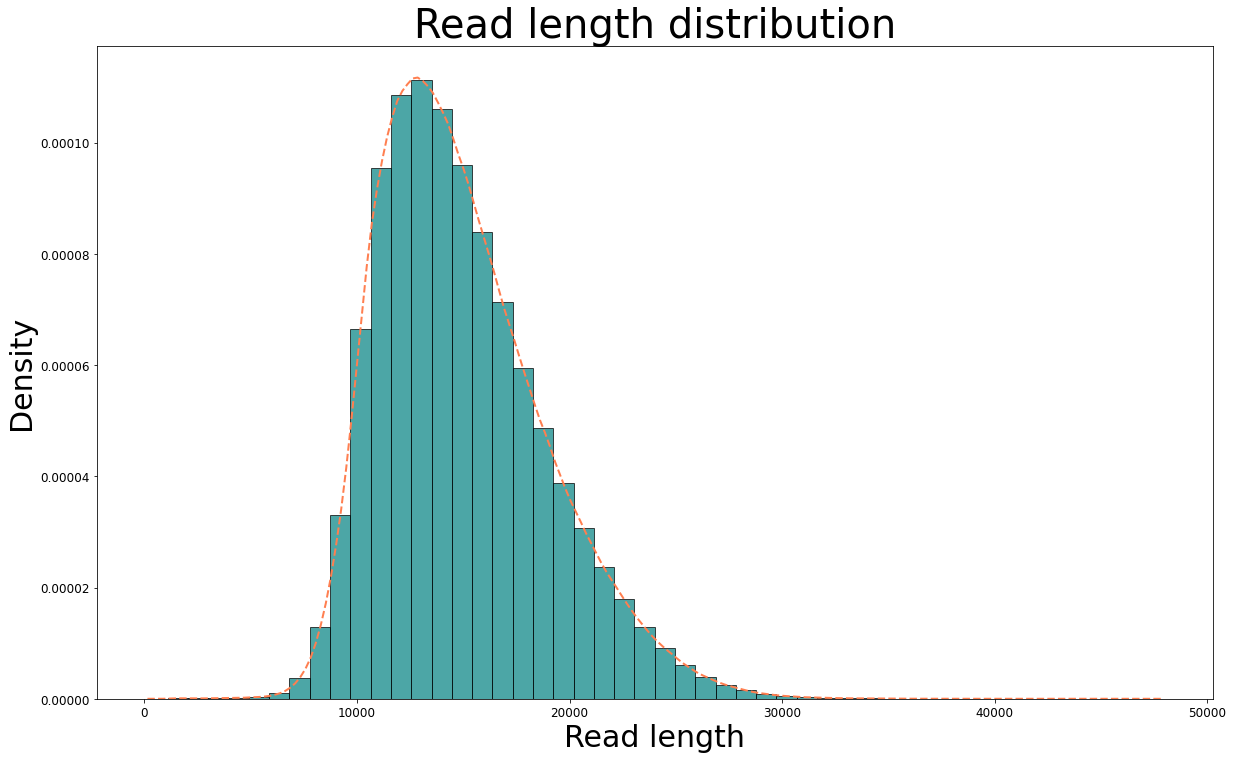

In [99]:
# Fit a kernel density estimate to the read lengths
density = gaussian_kde(read_lengths)

# Define a range of x values for the curve
x_vals = np.linspace(min(read_lengths), max(read_lengths), 200)

# Plot the histogram and KDE curve
fig, ax = plt.subplots(figsize=(20,12))
ax.hist(read_lengths, bins=50, density=True, color='teal', edgecolor='black', alpha=0.7)
ax.plot(x_vals, density(x_vals), color='#FF7F50', linestyle='--',linewidth=2)

# Add axis labels and a title
ax.set_xlabel('Read length', fontsize=30)
ax.set_ylabel('Density', fontsize=30)
ax.set_title('Read length distribution', fontsize=40)

# Set the font size of tick labels on both axes
ax.tick_params(axis='both', labelsize=12)

plt.savefig("read_distribution.png", dpi=300, bbox_inches='tight')


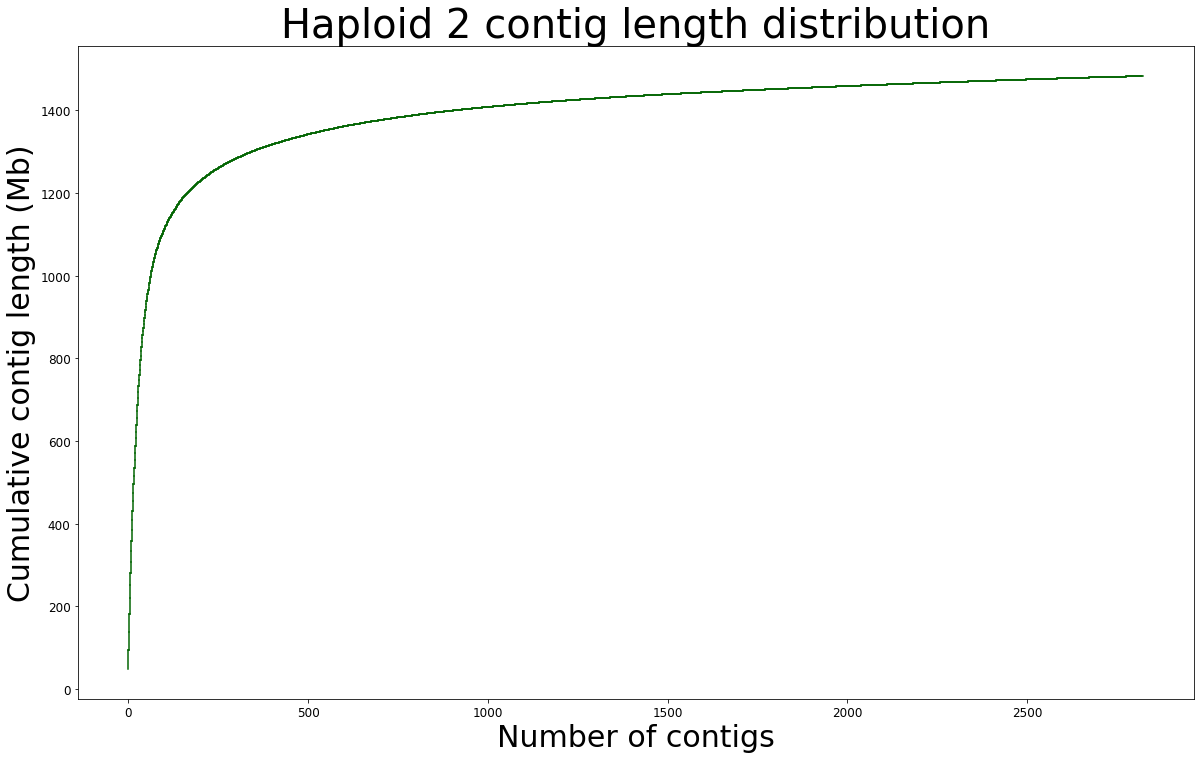

In [111]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np

# Read in the fasta file and get the lengths of the contigs
genome_file = "/home/taein/Denovo/Workings/hibiscus/working/hibiscus_sabdariffa.h2.fa"
contig_lengths = [len(record.seq) for record in SeqIO.parse(genome_file, "fasta")]

# Sort the contig lengths in descending order
contig_lengths.sort(reverse=True)

# Create a cumulative sum of the contig lengths in megabase (Mb) scale
cumulative_lengths = np.cumsum(contig_lengths) / 1000000

# Plot the cumulative contig lengths in descending order
fig, ax = plt.subplots(figsize=(20,12))
# ax.plot(cumulative_lengths, color='#006400')

# Set the title, x-axis label, and y-axis label
ax.set_title("Haploid 2 contig length distribution", fontsize=40)
ax.set_xlabel("Number of contigs", fontsize=30)
ax.set_ylabel("Cumulative contig length (Mb)", fontsize=30)

# Set the font size and color of the tick labels on both axes
ax.tick_params(axis='both', labelsize=12, colors='black')

# Reverse the x-axis and y-axis

# Apply the rules for each step
for i in range(1, len(cumulative_lengths)):
    x1 = i - 1
    y1 = cumulative_lengths[i - 1]
    x2 = i
    y2 = cumulative_lengths[i]
    
    ax.plot([x1, x1], [y1, y2], color='#006400', linestyle='-')
    ax.plot([x1, x2], [y2, y2], color='#006400', linestyle='-')

# Save the figure with the name "cumulative_contig_lengths.png"
fig.savefig("h2_contig_lengths.png", dpi=300, bbox_inches='tight')

In [ ]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np

# Read in the fasta file and get the lengths of the contigs
genome_file = "/home/taein/Denovo/Workings/hibiscus/working/hibiscus_sabdariffa.h1.fa"
contig_lengths = [len(record.seq) for record in SeqIO.parse(genome_file, "fasta")]

# Sort the contig lengths in descending order
contig_lengths.sort(reverse=True)

# Create a cumulative sum of the contig lengths in megabase (Mb) scale
cumulative_lengths = np.cumsum(contig_lengths) / 1000000

# Plot the cumulative contig lengths in descending order
fig, ax = plt.subplots(figsize=(20,12))
# ax.plot(cumulative_lengths, color='#006400')

# Set the title, x-axis label, and y-axis label
ax.set_title("Haploid 1 contig length distribution", fontsize=40)
ax.set_xlabel("Number of contigs", fontsize=30)
ax.set_ylabel("Cumulative contig length (Mb)", fontsize=30)

# Set the font size and color of the tick labels on both axes
ax.tick_params(axis='both', labelsize=12, colors='black')

# Reverse the x-axis and y-axis


# Apply the rules for each step
for i in range(1, len(cumulative_lengths)):
    x1 = i - 1
    y1 = cumulative_lengths[i - 1]
    x2 = i
    y2 = cumulative_lengths[i]
    
    ax.plot([x1, x1], [y1, y2], color='#006400', linestyle='-')
    ax.plot([x1, x2], [y2, y2], color='#006400', linestyle='-')

# Save the figure with the name "cumulative_contig_lengths.png"
fig.savefig("h1_contig_lengths.png", dpi=300, bbox_inches='tight')

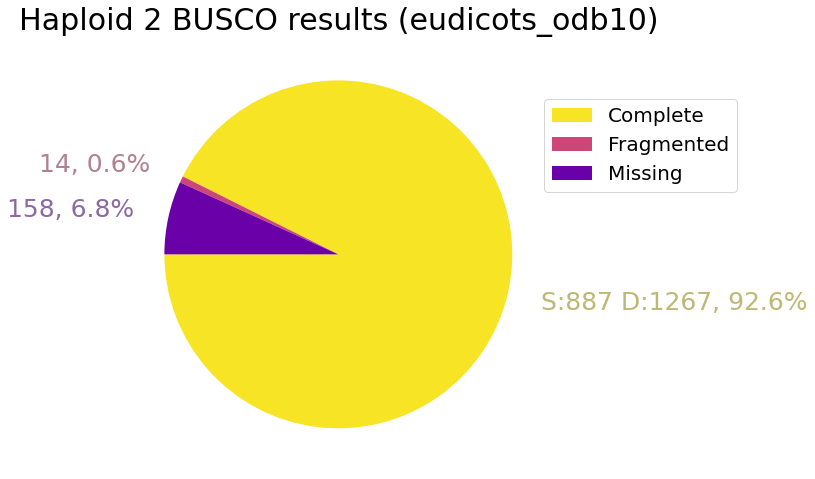

In [110]:
import matplotlib.pyplot as plt

sizes = [2154, 14, 158]
ratios = ['S:887 D:1267, 92.6%', '14, 0.6%', '158, 6.8%']
labels = ['Complete', 'Fragmented', 'Missing']


colors = plt.cm.plasma([0.95, 0.5, 0.2])

fig, ax = plt.subplots(figsize=(8, 8))
_, texts, autotexts = ax.pie(sizes, labels=ratios, autopct='%1.1f%%', startangle=180, colors=colors, textprops={'fontsize': 20}, labeldistance=1.2)

for i, text in enumerate(texts):
    text.set_color(colors[i]/1.7)
    text.set_fontsize(25)
    autotexts[i].set_text(f"")

ax.legend(plot, labels,
          loc="center left",
          bbox_to_anchor=(0.95, 0, 0.5, 1.5),
          fontsize=20)

ax.set_title("Haploid 2 BUSCO results (eudicots_odb10)", fontsize=30)
fig.savefig('h2_busco_results.png', dpi=300, bbox_inches='tight')


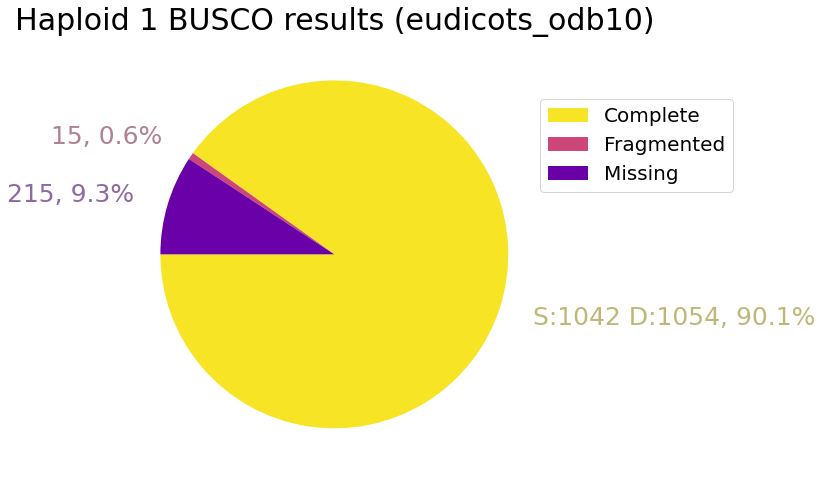

In [109]:
import matplotlib.pyplot as plt

sizes = [2096, 15, 215]
ratios = ['S:1042 D:1054, 90.1%', '15, 0.6%', '215, 9.3%']
labels = ['Complete', 'Fragmented', 'Missing']

colors = plt.cm.plasma([0.95, 0.5, 0.2])

fig, ax = plt.subplots(figsize=(8, 8))
plot, texts, autotexts = ax.pie(sizes, labels=ratios, autopct='%1.1f%%', startangle=180, colors=colors, textprops={'fontsize': 20}, labeldistance=1.2)

for i, text in enumerate(texts):
    text.set_color(colors[i]/1.7)
    text.set_fontsize(25)
    autotexts[i].set_text(f"")

ax.legend(plot, labels,
          loc="center left",
          bbox_to_anchor=(0.95, 0, 0.5, 1.5),
          fontsize=20)

ax.set_title("Haploid 1 BUSCO results (eudicots_odb10)", fontsize=30)
fig.savefig('h1_busco_results.png', dpi=300, bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt

sizes = [636317063,
16281690,
473989,
362236882,
22910841,
41919,
41654744,
17334693
]
labels = ['Retroelements (58.0%)',
'DNA transposons (1.5%)',
'Rolling-circles (0.0%)',
'Unclassified (33.0%)',
'Small RNA (2.1%)',
'Satellites (0.0 %)',
'Simple repeats (3.8 %)',
'Low complexity (1.6 %)',
]

colors = plt.cm.viridis([(len(sizes)-i)/len(sizes) for i in range(len(sizes))])

fig, ax = plt.subplots(figsize=(8, 8))
_, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors=colors, textprops={'fontsize': 18}, labeldistance=1.1)

x,y = texts[4].get_position()
texts[4].set_position((x,y+0.05))
x,y = texts[2].get_position()
texts[2].set_position((x,y+0.06))

for i, text in enumerate(texts):
    text.set_color(colors[i]/1.2)
    autotexts[i].set_text(f"")

ax.set_title("Haploid 2 Repetitive Elements", fontsize=30)
fig.savefig('h2_repeat.png', dpi=300, bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt

sizes = [659844473,
13703639,
458855,
326717778,
30709060,
47021,
41007044,
14169642,
]
labels = ['Retroelements (60.7%)',
'DNA transposons (1.3%)',
'Rolling-circles (0.0%)',
'Unclassified (30.1%)',
'Small RNA (2.8%)',
'Satellites (0.0 %)',
'Simple repeats (3.8 %)',
'Low complexity (1.3 %)',
]

colors = plt.cm.viridis([(len(sizes)-i)/len(sizes) for i in range(len(sizes))])

fig, ax = plt.subplots(figsize=(8, 8))
_, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors=colors, textprops={'fontsize': 18}, labeldistance=1.1)

x,y = texts[4].get_position()
texts[4].set_position((x,y+0.05))
x,y = texts[2].get_position()
texts[2].set_position((x,y+0.06))

for i, text in enumerate(texts):
    text.set_color(colors[i]/1.2)
    autotexts[i].set_text(f"")

ax.set_title("Haploid 1 Repetitive Elements", fontsize=30)
fig.savefig('h1_repeat.png', dpi=300, bbox_inches='tight')

In [8]:
import pandas as pd
import numpy as np
def out_to_csv(out_path, new_csv_path):
    with open(out_path) as f:
        outs = f.readlines()
        outs = [i.split() for i in outs]
    scaffolds = [i[4] for i in outs]
    lengths = [int(i[12]) for i in outs]
    df = pd.DataFrame({"Scaffold" : scaffolds, "Lengths" : lengths})
    df.to_csv(new_csv_path)
    return scaffolds, lengths, df


47


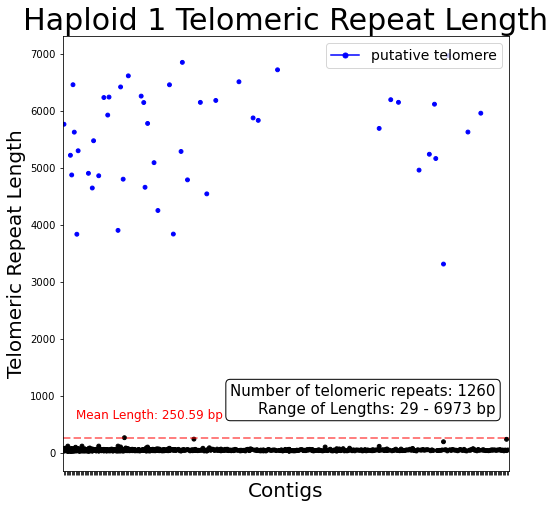

In [9]:
contigs, lens, _ = out_to_csv("h1_telomere.txt","h1_telomere.csv")
import matplotlib.pyplot as plt
import numpy as np
colors = ['blue' if x > 1000 else 'black' for x in lens]
print(len([i for i in lens if i > 1000]))

contig_ids = {contig: i for i, contig in enumerate(sorted(set(contigs)))}
ids = [contig_ids[contig] for contig in contigs]

# set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# plot the data as scatter points
ax.scatter(ids, lens, s=15, color=colors)
blue_dot = plt.Line2D([], [], marker='o', color='blue', markersize=5, label='putative telomere')
ax.legend(handles=[blue_dot], loc='upper right',fontsize=14)


mean_length = np.mean(lens)
ax.axhline(mean_length, linestyle='--', color='red', linewidth=2, alpha=0.5)
ax.text(0.03, 0.12, f"Mean Length: {mean_length:.2f} bp", transform=ax.transAxes, fontsize=12, color='red')

num_repeats = len(lens)
min_length = min(lens)
max_length = max(lens)
textbox_text = f"Number of telomeric repeats: {num_repeats}\nRange of Lengths: {min_length} - {max_length} bp"
props = dict(boxstyle='round', facecolor='white', alpha=1)
ax.text(0.97, 0.2, textbox_text, transform=ax.transAxes, fontsize=15, color='black', ha='right', va='top', bbox=props)

# set the x-tick labels to the contig names
ax.set_xticks(range(len(contig_ids)))
ax.set_xticklabels([])

# set the x-axis limits and label
ax.set_xlim([-1, len(contig_ids)])
ax.set_xlabel("Contigs", fontsize=20)

# set the y-axis label
ax.set_ylabel("Telomeric Repeat Length", fontsize=20)

# set the title
ax.set_title("Haploid 1 Telomeric Repeat Length", fontsize=30)

fig.savefig('h1_telomere.png', dpi=300, bbox_inches='tight')

42


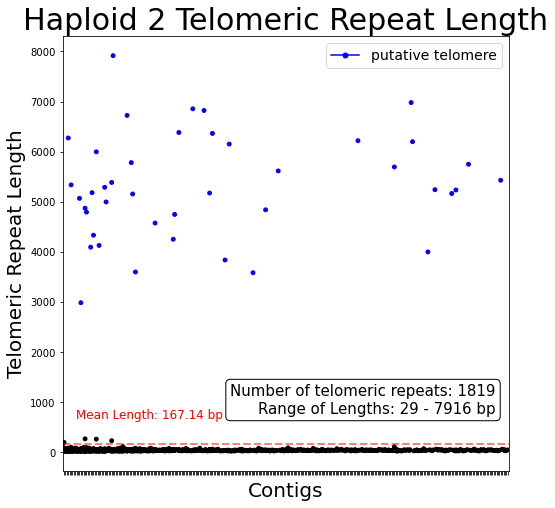

In [10]:
contigs, lens, _ = out_to_csv("h2_telomere.txt","h2_telomere.csv")
import matplotlib.pyplot as plt
import numpy as np
colors = ['blue' if x > 1000 else 'black' for x in lens]
print(len([i for i in lens if i > 1000]))

contig_ids = {contig: i for i, contig in enumerate(sorted(set(contigs)))}
ids = [contig_ids[contig] for contig in contigs]

# set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# plot the data as scatter points
ax.scatter(ids, lens, s=15, color=colors)
blue_dot = plt.Line2D([], [], marker='o', color='blue', markersize=5, label='putative telomere')
ax.legend(handles=[blue_dot], loc='upper right',fontsize=14)


mean_length = np.mean(lens)
ax.axhline(mean_length, linestyle='--', color='red', linewidth=2, alpha=0.5)
ax.text(0.03, 0.12, f"Mean Length: {mean_length:.2f} bp", transform=ax.transAxes, fontsize=12, color='red')

num_repeats = len(lens)
min_length = min(lens)
max_length = max(lens)
textbox_text = f"Number of telomeric repeats: {num_repeats}\nRange of Lengths: {min_length} - {max_length} bp"
props = dict(boxstyle='round', facecolor='white', alpha=1)
ax.text(0.97, 0.2, textbox_text, transform=ax.transAxes, fontsize=15, color='black', ha='right', va='top', bbox=props)

# set the x-tick labels to the contig names
ax.set_xticks(range(len(contig_ids)))
ax.set_xticklabels([])

# set the x-axis limits and label
ax.set_xlim([-1, len(contig_ids)])
ax.set_xlabel("Contigs", fontsize=20)

# set the y-axis label
ax.set_ylabel("Telomeric Repeat Length", fontsize=20)

# set the title
ax.set_title("Haploid 2 Telomeric Repeat Length", fontsize=30)

fig.savefig('h2_telomere.png', dpi=300, bbox_inches='tight')

[707, 346, 141, 341, 194, 75]


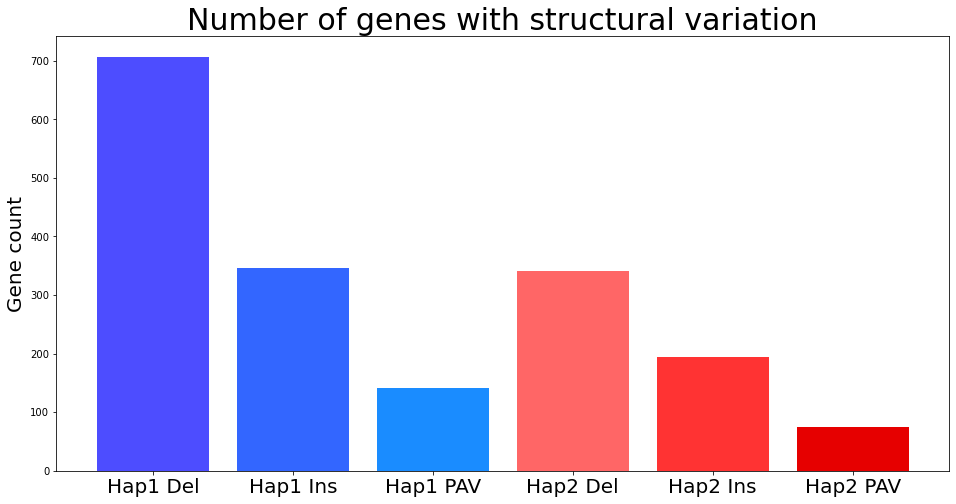

In [2]:
import matplotlib.pyplot as plt

with open("/home/taein/Denovo/Workings/hibiscus/working/h1_Hifi/geneList.deletion.txt") as f:
    hap1_del = f.readlines()
    hap1_del = [i.rstrip() for i in hap1_del] 
    
with open("/home/taein/Denovo/Workings/hibiscus/working/h1_Hifi/geneList.insertion.txt") as f:
    hap1_ins = f.readlines()
    hap1_ins = [i.rstrip() for i in hap1_ins] 
    
with open("/home/taein/Denovo/Workings/hibiscus/working/h1_Hifi/geneList.possiblePAV.txt") as f:
    hap1_pav = f.readlines()
    hap1_pav = [i.rstrip() for i in hap1_pav] 
    
with open("/home/taein/Denovo/Workings/hibiscus/working/h2_Hifi/geneList.deletion.txt") as f:
    hap2_del = f.readlines()
    hap2_del = [i.rstrip() for i in hap2_del] 
    
with open("/home/taein/Denovo/Workings/hibiscus/working/h2_Hifi/geneList.insertion.txt") as f:
    hap2_ins = f.readlines()
    hap2_ins = [i.rstrip() for i in hap2_ins] 
    
with open("/home/taein/Denovo/Workings/hibiscus/working/h2_Hifi/geneList.possiblePAV.txt") as f:
    hap2_pav = f.readlines()
    hap2_pav = [i.rstrip() for i in hap2_pav] 

hap1_color = ['#4d4dff', '#3366ff', '#1a8cff']
hap2_color = ['#ff6666', '#ff3333', '#e60000']

fig, ax = plt.subplots(figsize=(16, 8))

print([len(hap1_del), len(hap1_ins), len(hap1_pav), len(hap2_del), len(hap2_ins), len(hap2_pav)])

ax.bar([0, 1, 2, 3, 4, 5], [len(hap1_del), len(hap1_ins), len(hap1_pav), len(hap2_del), len(hap2_ins), len(hap2_pav)], 
       color=hap1_color+hap2_color)

ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['Hap1 Del', 'Hap1 Ins', 'Hap1 PAV', 'Hap2 Del', 'Hap2 Ins', 'Hap2 PAV'], rotation=0, ha='center',fontsize=20)
ax.set_ylabel('Gene count',fontsize=20)
ax.set_title('Number of genes with structural variation', fontsize=30)

fig.savefig('structural_variation.png', dpi=300, bbox_inches='tight')